### Importação dos dados



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [11]:
fat1 = loja
fat2 = loja2
fat3 = loja3
fat4 = loja4

fat1t = fat1['Preço'].sum()
fat2t = fat2['Preço'].sum()
fat3t = fat3['Preço'].sum()
fat4t = fat4['Preço'].sum()

df_fat = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Faturamento Total': [fat1t, fat2t, fat3t, fat4t]
})

print(df_fat.head())

     Loja  Faturamento Total
0  Loja 1         1534509.12
1  Loja 2         1488459.06
2  Loja 3         1464025.03
3  Loja 4         1384497.58


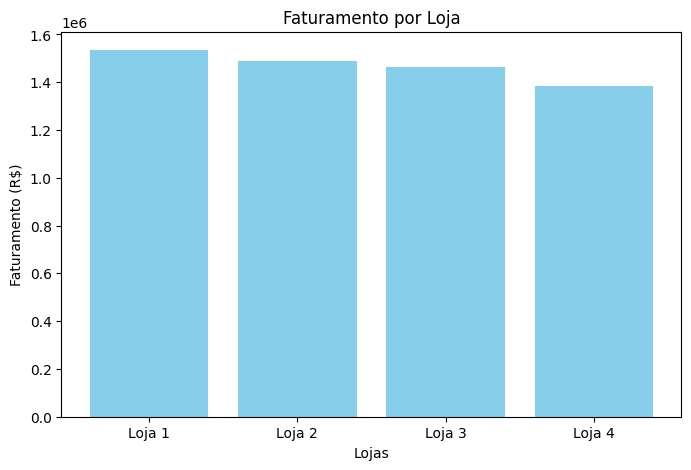

In [12]:
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [fat1t, fat2t, fat3t, fat4t]

plt.figure(figsize=(8, 5))
plt.bar(lojas, faturamentos, color='skyblue')


plt.title('Faturamento por Loja')
plt.xlabel('Lojas')
plt.ylabel('Faturamento (R$)')

plt.show()

Loja 4 foi a loja que faturou menos, enquanto a Loja 1 teve o maior faturamento.

# 2. Vendas por Categoria


In [ ]:
cat1 = loja
cat2 = loja2
cat3 = loja3
cat4 = loja4

cat1t = cat1['Categoria do Produto'].value_counts().head(5)
cat2t = cat2['Categoria do Produto'].value_counts().head(5)
cat3t = cat3['Categoria do Produto'].value_counts().head(5)
cat4t = cat4['Categoria do Produto'].value_counts().head(5)

while True:
    print('Escolha qual a loja que deseja ver os produtos mais vendidos:')
    print('1 - Loja 1, 2 - Loja 2, 3 - Loja 3, 4 - Loja 4, 5 - Sair')

    escolha = input("Digite a opção: ")

    if not escolha.isdigit():
        print("Digite um número válido.")
        continue

    escolha = int(escolha)

    if escolha == 1:
        print(cat1t.head())
    elif escolha == 2:
        print(cat2t.head())
    elif escolha == 3:
        print(cat3t.head())
    elif escolha == 4:
        print(cat4t.head())
    elif escolha == 5:
        print("Saindo...")
        break
    else:
        print("Opção inválida. Tente novamente.")


# 3. Média de Avaliação das Lojas

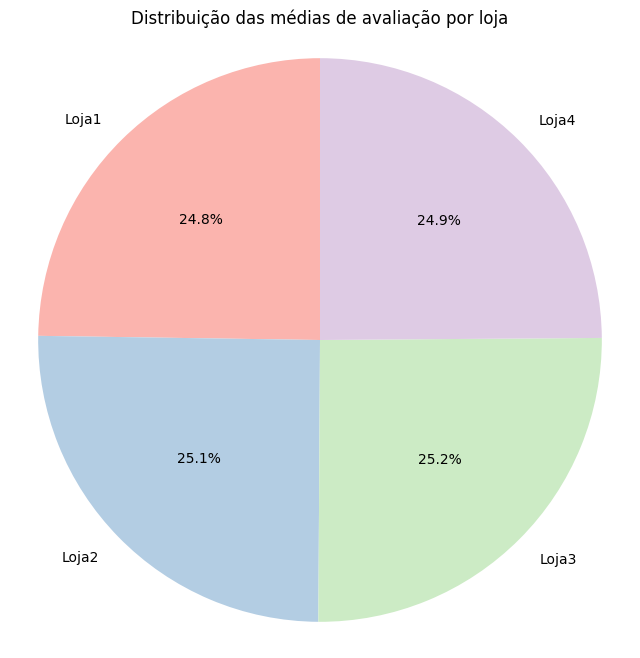

In [25]:
df1 = loja
dfa1 = df1["Avaliação da compra"].mean()

df2 = loja2
dfa2 = df2["Avaliação da compra"].mean()


df3 = loja3
dfa3 = df3["Avaliação da compra"].mean()


df4 = loja4
dfa4 = df4["Avaliação da compra"].mean()


medias = [dfa1, dfa2, dfa3, dfa4]
lojas = ["Loja1", "Loja2", "Loja3", "Loja4"]

plt.figure(figsize=(8, 8))
plt.pie(medias, labels=lojas, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title("Distribuição das médias de avaliação por loja")
plt.axis('equal')
plt.show()

A Loja 1 teve o pior desempenho em Avalição da Compra

# 4. Produtos Mais e Menos Vendidos

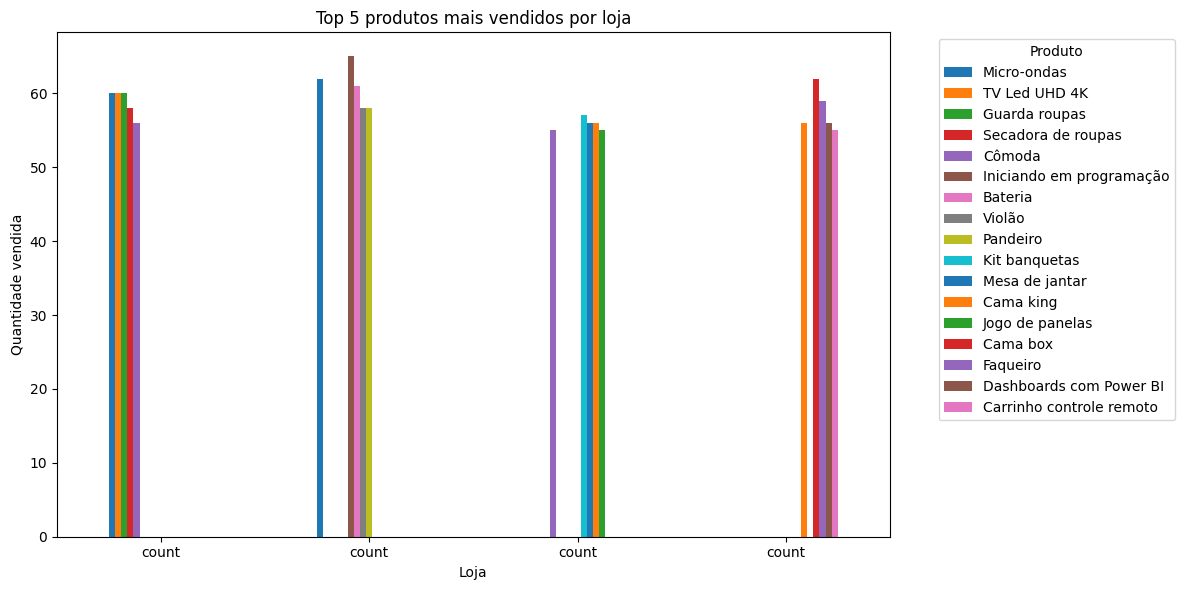

In [3]:
prod1 = df1["Produto"].value_counts()
prod2 = df2["Produto"].value_counts()
prod3 = df3["Produto"].value_counts()
prod4 = df4["Produto"].value_counts()

prodv1 = prod1.head(5)
prodv2 = prod2.head(5)
prodv3 = prod3.head(5)
prodv4 = prod4.head(5)

df_top5 = pd.concat([prodv1, prodv2, prodv3, prodv4], axis=1).fillna(0)
df_top5 = df_top5.T

df_top5.plot(kind="bar", figsize=(12, 6))

plt.title("Top 5 produtos mais vendidos por loja")
plt.xlabel("Loja")
plt.ylabel("Quantidade vendida")
plt.xticks(rotation=0)
plt.legend(title="Produto", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

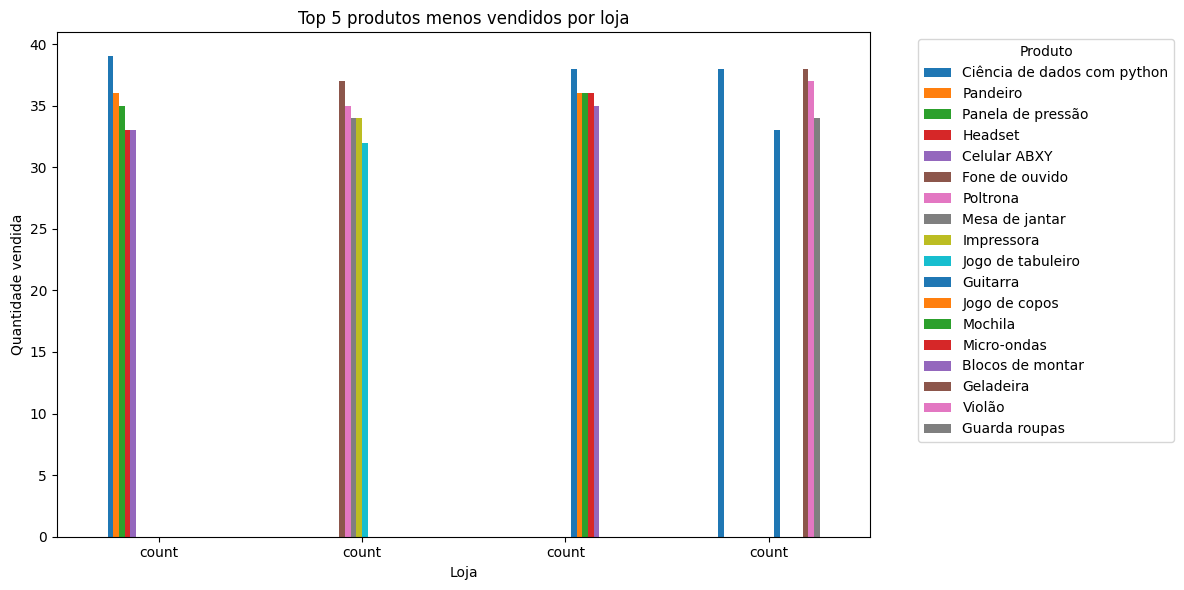

In [ ]:
prod1menos = df1["Produto"].value_counts().tail()
prod2menos = df2["Produto"].value_counts().tail()
prod3menos = df3["Produto"].value_counts().tail()
prod4menos = df4["Produto"].value_counts().tail()

df_top5menos = pd.concat([prod1menos, prod2menos, prod3menos, prod4menos], axis=1).fillna(0)

df_top5menos = df_top5menos.T

df_top5menos.plot(kind="bar", figsize=(12, 6))

plt.title("Top 5 produtos menos vendidos por loja")
plt.xlabel("Loja")
plt.ylabel("Quantidade vendida")
plt.xticks(rotation=0)
plt.legend(title="Produto", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Os que venderam menos da Loja 4 venderam mais do que os que menos venderam da Loja 1. Por outro lado, os produtos que mais venderam da Loja 1 venderam mais do que os produtos que mais venderam da Loja 4. Porém, como a Loja 1 ficou atrás no quesito Avaliação, há 2 pontos para a Loja 1 ser vendida, contra 1 ponto para a Loja 4 ser vendida

# 5. Frete Médio por Loja


In [8]:
frete1 = loja
frete2 = loja2
frete3 = loja3
frete4 = loja4

fm1 = frete1['Frete'].mean()
fm2 = frete2['Frete'].mean()
fm3 = frete3['Frete'].mean()
fm4 = frete4['Frete'].mean()


df_fretes = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Frete Médio': [fm1, fm2, fm3, fm4]
})
print(df_fretes.head())

     Loja  Frete Médio
0  Loja 1    34.691805
1  Loja 2    33.621941
2  Loja 3    33.074464
3  Loja 4    31.278997


A média de gastos com frete da loja 1 é maior do que as outras lojas, mais um ponto para que seja vendida a loja 1.

## Relatorio


A Loja a ser vendida é a Loja 4, pois o único indicador em que ela foi bem foi o custo de frete. A Loja 1 apresentou desempenho pior em quase todos os indicadores, porém ela possui o maior faturamento, portanto, se a loja 1 fosse vendida, haveria perda do maior faturmanto dentre as lojas. Portanto, foi escolhida a Loja 4 para ser vendida.